/home/vscode/.local/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


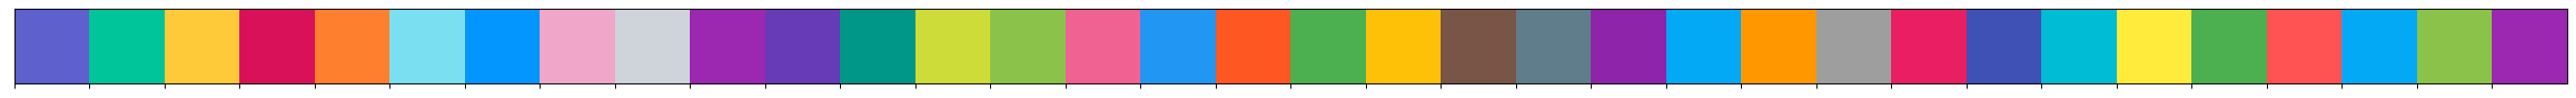

In [1]:
from sklearn import preprocessing
from base import *
from umap_func import *
import json
import matplotlib
import copy
# matplotlib font setting for illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
# load umap df
umap_df = pd.read_csv('clean_template_npy/all_neurons/new_umap_df.csv', index_col=0)

In [3]:
umap_df

,x,y,waveform,color
0,9.429234,5.561916,[ 0.04341648 0.05389632 0.0673704 0.077850...,11
1,9.478931,5.653905,[ 0.04856659 0.06043842 0.07554802 0.083102...,11
2,0.225073,10.119474,[ 7.64138775e-03 9.55173444e-03 1.36453351e-...,0
3,1.270366,10.554436,[ 0.03015763 0.02920024 0.02106247 0.017711...,0
4,9.472432,5.666215,[ 0.02430991 0.04254234 0.05621666 0.068371...,11
...,...,...,...,...
3400,5.662167,4.611991,[ 0.03735463 0.0440251 0.04902795 0.057366...,9
3401,6.251099,8.827670,[ 0.04070441 0.04353602 0.04565973 0.046367...,8
3402,3.523189,10.322666,[ 0.03356858 0.03773212 0.03981389 0.039163...,5
3403,6.622393,8.906881,[ 0.03585628 0.04881275 0.0545377 0.056044...,8


In [4]:
for i in range(umap_df.shape[0]):
    wf = umap_df.iloc[i]["waveform"]
    float_strings = wf.strip('[]').split()     # convert the string respresentation to a list of strings
    # Convert each float string to a float value
    float_wf = np.array([float(value) for value in float_strings])
    umap_df.at[i, "waveform"] = float_wf

In [5]:
# plot umap and color clustter [5, 6, 8, 9, 10] by the same color
run_umap = False
if run_umap: 
    figure_name = f"neurons_2023_cut_norm_exclude"
    umap_color_ids = copy.deepcopy(umap_df["color"].values)
    for i in [4, 5, 7, 8, 9]:   # color is cluster id minus 1
        umap_color_ids[umap_color_ids == i] = 4
    # use color gradient for the selected clusters -- it turns out that the color gradient is not obvious enough
    # CUSTOM_PAL_SORT_3_copy = copy.deepcopy(CUSTOM_PAL_SORT_3)
    # CUSTOM_PAL_SORT_3_copy[4] = '#fe9f61'
    # CUSTOM_PAL_SORT_3_copy[5] = '#fe9754'
    # CUSTOM_PAL_SORT_3_copy[7] = '#fe9047'
    # CUSTOM_PAL_SORT_3_copy[8] = '#fd883c'
    # CUSTOM_PAL_SORT_3_copy[9] = '#fd7d29'


    cluster_colors = [CUSTOM_PAL_SORT_3[i] for i in umap_color_ids]

    f, arr = plt.subplots(1, figsize=[7, 4.5], tight_layout={'pad': 0})
    f.tight_layout()
    arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
                marker='o', c=cluster_colors, s=32, edgecolor='w',
                linewidth=0.5)
    arr.spines['top'].set_visible(False)
    arr.spines['bottom'].set_visible(False)
    arr.spines['left'].set_visible(False)
    arr.spines['right'].set_visible(False)
    arr.set_xticks([])
    arr.set_yticks([])
    # arr.set_xlim(-4, 12)
    # arr.set_ylim(0, 12)

    arr.arrow(-3, 0.8, 0, 1.5, width=0.05, shape="full", ec="none", fc="black")
    arr.arrow(-3, 0.8, 1.2, 0, width=0.05, shape="full", ec="none", fc="black")

    arr.text(-3, 0.3, "UMAP 1", va="center")
    arr.text(-3.5, 1.0, "UMAP 2", rotation=90, ha="left", va="bottom")

    plt.savefig(f"clean_template_npy/all_neurons/{figure_name}_umap_recolor.png", dpi=300)
    plt.savefig(f"clean_template_npy/all_neurons/{figure_name}_umap_recolor.pdf", dpi=300)

    # also plot waveforms
    ALLclass = list(np.unique(umap_df["color"].values)+1)
    fig, axs = plt.subplots(len(ALLclass), 1, figsize=(3*0.7, 1.8*0.7*len(ALLclass)))
    for ci in ALLclass: 
        ind = ALLclass.index(ci)
        arr = plot_group(ci, list(umap_df["color"].values), umap_df, CUSTOM_PAL_SORT_3, 
                        color_clusters=[5, 6, 8, 9, 10], color=4, arr=axs[ind])
        # arr = plot_group(ci, list(umap_df["color"].values), umap_df, CUSTOM_PAL_SORT_3, arr=axs[ind])
    plt.savefig(f"clean_template_npy/all_neurons/{figure_name}_clusters_recolor.png", dpi=300)
    plt.savefig(f"clean_template_npy/all_neurons/{figure_name}_clusters_recolor.pdf", dpi=300)

In [6]:
# load metadata json
with open('clean_template_npy/all_neurons/new_info.json') as f:
    all_temp_info = json.load(f)
# open new_bad_spike_index.npy
bad_spike_index = np.load('clean_template_npy/all_neurons/new_bad_spike_index.npy')

In [7]:
all_neurons_index = np.arange(len(all_temp_info))
updated_neurons_index = np.delete(all_neurons_index, bad_spike_index)
# add these to the umap_df under column "neuron_index"
umap_df["neuron_index"] = updated_neurons_index  # index of the neurons in all of the waveforms 

# read recordings and unit location from all_temp_info and add to umap_df
for stri, data in all_temp_info.items():
    ind = int(stri)
    rec = data["dataset"]
    umap_df.loc[umap_df.neuron_index == ind, "exp"] = data["dataset"].split("_cleaned")[0]
    umap_df.loc[umap_df.neuron_index == ind, "unit_id"] = int(data["index"])
    umap_df.loc[umap_df.neuron_index == ind, "pos_x"] = data["location"][0]
    umap_df.loc[umap_df.neuron_index == ind, "pos_y"] = data["location"][1]
    
umap_df

,x,y,waveform,color,neuron_index,exp,unit_id,pos_x,pos_y
0,9.429234,5.561916,"[0.04341648, 0.05389632, 0.0673704, 0.07785024...",11,0,Hc120523_aav9hckcr1_chip21774_121123_0,0.0,3430.0,1697.5
1,9.478931,5.653905,"[0.04856659, 0.06043842, 0.07554802, 0.0831028...",11,1,Hc120523_aav9hckcr1_chip21774_121123_0,1.0,3430.0,1697.5
2,0.225073,10.119474,"[0.00764138775, 0.00955173444, 0.0136453351, 0...",0,2,Hc120523_aav9hckcr1_chip21774_121123_0,2.0,3342.5,1697.5
3,1.270366,10.554436,"[0.03015763, 0.02920024, 0.02106247, 0.0177116...",0,3,Hc120523_aav9hckcr1_chip21774_121123_0,3.0,3255.0,1697.5
4,9.472432,5.666215,"[0.02430991, 0.04254234, 0.05621666, 0.0683716...",11,4,Hc120523_aav9hckcr1_chip21774_121123_0,4.0,3360.0,1592.5
...,...,...,...,...,...,...,...,...,...
3400,5.662167,4.611991,"[0.03735463, 0.0440251, 0.04902795, 0.05736604...",9,3674,Hc120523_aav9hckcr1_chip21769_121123_base,27.0,2187.5,70.0
3401,6.251099,8.827670,"[0.04070441, 0.04353602, 0.04565973, 0.0463676...",8,3675,Hc120523_aav9hckcr1_chip21769_121123_base,28.0,2117.5,17.5
3402,3.523189,10.322666,"[0.03356858, 0.03773212, 0.03981389, 0.0391633...",5,3676,Hc120523_aav9hckcr1_chip21769_121123_base,29.0,2765.0,595.0
3403,6.622393,8.906881,"[0.03585628, 0.04881275, 0.0545377, 0.05604427...",8,3677,Hc120523_aav9hckcr1_chip21769_121123_base,30.0,2187.5,70.0


In [8]:
# color umap by opto response
opto_df = pd.read_csv('clean_template_npy/all_neurons/cluster_csv/joined_clusters.csv', index_col=0)
opto_df

,unit,cluster_peristimulus,cluster_waveform
exp,,,
2023_04_04_hc328_hckcr1-2_2,0,-1,3
2023_04_04_hc328_hckcr1-2_2,1,-1,12
2023_04_04_hc328_hckcr1-2_2,5,-1,9
2023_04_04_hc328_hckcr1-2_2,6,-1,3
2023_04_04_hc328_hckcr1-2_2,7,-1,1
...,...,...,...
Hc120523_aav9hckcr1_chip21774_121123_0,4,-1,12
Hc120523_aav9hckcr1_chip21774_121123_0,5,-1,-1
Hc120523_aav9hckcr1_chip21774_121123_0,6,-1,4


In [9]:
# change opto_df index to the range of the number of neurons
opto_df["exp"] = opto_df.index.values
opto_df.index = np.arange(len(opto_df))
print(opto_df)

      unit  cluster_peristimulus  cluster_waveform  \
0        0                    -1                 3   
1        1                    -1                12   
2        5                    -1                 9   
3        6                    -1                 3   
4        7                    -1                 1   
...    ...                   ...               ...   
1961     4                    -1                12   
1962     5                    -1                -1   
1963     6                    -1                 4   
1964     7                    -1                 5   
1965     8                    -1                 1   

                                         exp  
0                2023_04_04_hc328_hckcr1-2_2  
1                2023_04_04_hc328_hckcr1-2_2  
2                2023_04_04_hc328_hckcr1-2_2  
3                2023_04_04_hc328_hckcr1-2_2  
4                2023_04_04_hc328_hckcr1-2_2  
...                                      ...  
1961  Hc120523_aav9hck

In [10]:
# add opto cluster_peristimulus to umap_df by exp and unit_id
umap_df["opto_cluster_peristimulus"] = np.nan
for i in range(umap_df.shape[0]):
    exp = umap_df.iloc[i]["exp"]
    unit_id = int(umap_df.iloc[i]["unit_id"])
    opto_cluster = opto_df[(opto_df["exp"] == exp) & (opto_df["unit"] == unit_id)]["cluster_peristimulus"].values
    if len(opto_cluster) > 0:
        umap_df.at[i, "opto_cluster_peristimulus"] = opto_cluster[0]


In [11]:
# plot umap and color by opto_cluster_peristimulus
figure_name = f"neurons_exclude_uamp_color_opto"
response_color_marker = {-1: "k",    # outlier
                          0: "C0",   # opto-responsive
                          1: "C1",   # weakly opto-responsive
                          2: "C2",   # opto-responsive
                          3: "C3",   # unresponsive
                          4: "C4",}  # weakly opto-responsive

Text(-3.5, 1.0, 'UMAP 2')

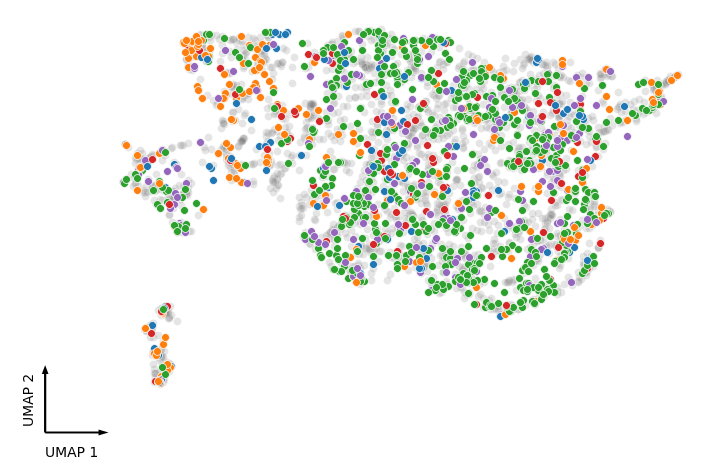

In [12]:
# plot umap using the color of opto_cluster_peristimulus
f, arr = plt.subplots(1, figsize=[7, 4.5], tight_layout={'pad': 0})
f.tight_layout()
# plot original umap as a background
umap_color_ids = umap_df["color"].values
cluster_colors = [CUSTOM_PAL_SORT_3[i] for i in umap_color_ids]
# arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
#             marker='o', c=cluster_colors, s=32, edgecolor='w',
#             linewidth=0.5, alpha=0.2)
arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
            marker='o', c="gray", s=32, edgecolor='w',
            linewidth=0.5, alpha=0.2)

# plot opto_cluster_peristimulus
for i in range(umap_df.shape[0]):
    opto_cluster = umap_df["opto_cluster_peristimulus"][i]
    if not pd.isnull(opto_cluster) and opto_cluster != -1:
        arr.scatter(umap_df['x'][i], umap_df['y'][i],
                    marker='o', c=response_color_marker[opto_cluster], s=32, edgecolor='w',
                    linewidth=0.5, alpha=1)

arr.spines['top'].set_visible(False)
arr.spines['bottom'].set_visible(False)
arr.spines['left'].set_visible(False)
arr.spines['right'].set_visible(False)
arr.set_xticks([])
arr.set_yticks([])

arr.arrow(-3, 0.8, 0, 1.5, width=0.05, shape="full", ec="none", fc="black")
arr.arrow(-3, 0.8, 1.2, 0, width=0.05, shape="full", ec="none", fc="black")

arr.text(-3, 0.3, "UMAP 1", va="center")
arr.text(-3.5, 1.0, "UMAP 2", rotation=90, ha="left", va="bottom")

# plt.savefig(f"clean_template_npy/all_neurons/{figure_name}.png", dpi=300)
# plt.savefig(f"clean_template_npy/all_neurons/{figure_name}.pdf", dpi=300)


In [44]:
# plot electrode map using the color of opto_cluster_peristimulus for 
# slice Hc112823_aav9hckcr1_21841_120323, 2023-04-02-hc328_rec
# get data and plot for S1: 2023_04_02_hc328_rec
# slice = "2023-04-02-hc328_rec"
# slice_recs = ["2023_04_02_hc328_0", "2023_04_02_hc328_1", "2023_04_02_hc328_2",
#               "2023_04_02_hc328_3", "2023_04_02_hc328_4", "2023_04_02_hc328_5",
#               "2023_04_02_hc328_6", "2023_04_02_hc328_7"]

# get data and plot for S2: Hc112823_aav9hckcr1_21841_120323
slice = "Hc112823_avv9hckcr1_21841_120323"
slice_recs = ["Hc112823_avv9hckcr1_21841_120323_0", "Hc112823_avv9hckcr1_21841_120323_1",
              "Hc112823_avv9hckcr1_21841_120323_2", "Hc112823_avv9hckcr1_21841_120323_3",
              "Hc112823_avv9hckcr1_21841_120323_4", "Hc112823_avv9hckcr1_21841_120323_5"]
# get and append sub_df
all_sub_df = pd.DataFrame()
for i in range(len(slice_recs)):
    sub_df = umap_df[umap_df["exp"] == slice_recs[i]]
    if i == 0:
        all_sub_df = sub_df
    else:
        all_sub_df = all_sub_df.append(sub_df)

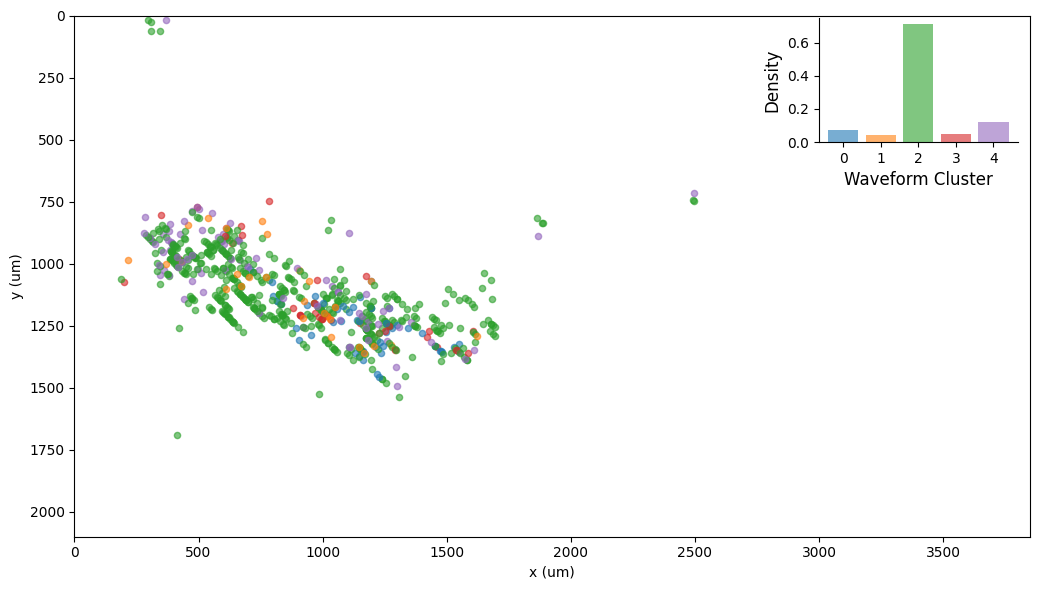

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(11, 6), tight_layout=True)
axs.set_aspect('equal')
color_labels = {}
for i in range(all_sub_df.shape[0]):
    opto_cluster = all_sub_df["opto_cluster_peristimulus"].values[i]
    pos_x = all_sub_df["pos_x"].values[i]
    pos_y = all_sub_df["pos_y"].values[i]
    if not pd.isnull(opto_cluster) and opto_cluster != -1:
        gitter = random.uniform(-17.5, 17.5)
        color = response_color_marker[opto_cluster]
        axs.scatter(pos_x+gitter, pos_y+gitter, c=color, s=20, alpha=0.6) 
        if opto_cluster not in color_labels:
            color_labels[opto_cluster] = 1
        else: 
            color_labels[opto_cluster] += 1
# sort color_labels by key
color_labels = dict(sorted(color_labels.items()))
total = np.sum(list(color_labels.values())) 
# plot color histogram as inset 
axin = axs.inset_axes([3000, 10, 800, 500], transform=axs.transData)
for k, v in color_labels.items():
    axin.bar(k, v/total, color=response_color_marker[k], alpha=0.6)
    # # show counts on top of the bars
    # axin.text(k, v/total, f"{v}", ha='center', va='bottom', fontsize=8)
axin.spines['right'].set_visible(False)
axin.spines['top'].set_visible(False)
# set the axin x axis tick labels
axin.set_xticks(list(response_color_marker.keys())[1:])  
# don't show -1 on x axis, show only 0-4
# axin.set_xticklabels(list(response_color_marker.keys()))
axin.set_xlabel("Waveform Cluster", fontsize=12)
axin.set_ylabel("Density", fontsize=12)

axs.set_xlim(0, 3850)
axs.set_ylim(0, 2100) 
axs.invert_yaxis()     
axs.set_xlabel("x (um)")
axs.set_ylabel("y (um)")
# show the key figures only, close the rest
plt.savefig(f"clean_template_npy/all_neurons/new_{slice}_map_opto_cluster.png", dpi=300, transparent=True)
plt.savefig(f"clean_template_npy/all_neurons/new_{slice}_map_opto_cluster.pdf", dpi=300, transparent=True)
# plt.close()

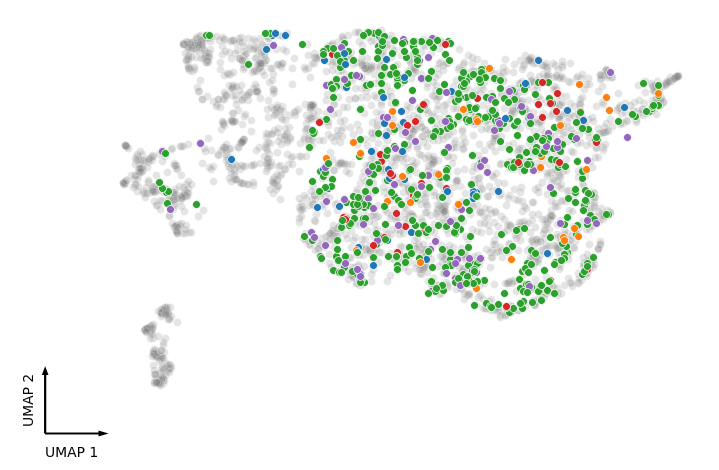

In [46]:
# plot umap using the color of opto_cluster_peristimulus for the selected slice
f, arr = plt.subplots(1, figsize=[7, 4.5], tight_layout={'pad': 0})
f.tight_layout()
# plot original umap as a background
sub_color_ids = all_sub_df["color"].values
cluster_colors = [CUSTOM_PAL_SORT_3[i] for i in sub_color_ids]
# arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
#             marker='o', c=cluster_colors, s=32, edgecolor='w',
#             linewidth=0.5, alpha=0.2)
arr.scatter(umap_df['x'].tolist(), umap_df['y'].tolist(),
            marker='o', c="gray", s=32, edgecolor='w',
            linewidth=0.5, alpha=0.2)

# plot opto_cluster_peristimulus
for i in range(all_sub_df.shape[0]):
    opto_cluster = all_sub_df["opto_cluster_peristimulus"].values[i]
    if not pd.isnull(opto_cluster) and opto_cluster != -1:
        arr.scatter(all_sub_df['x'].values[i], all_sub_df['y'].values[i],
                    marker='o', c=response_color_marker[opto_cluster], s=32, edgecolor='w',
                    linewidth=0.5, alpha=1)

arr.spines['top'].set_visible(False)
arr.spines['bottom'].set_visible(False)
arr.spines['left'].set_visible(False)
arr.spines['right'].set_visible(False)
arr.set_xticks([])
arr.set_yticks([])

arr.arrow(-3, 0.8, 0, 1.5, width=0.05, shape="full", ec="none", fc="black")
arr.arrow(-3, 0.8, 1.2, 0, width=0.05, shape="full", ec="none", fc="black")

arr.text(-3, 0.3, "UMAP 1", va="center")
arr.text(-3.5, 1.0, "UMAP 2", rotation=90, ha="left", va="bottom")

plt.savefig(f"clean_template_npy/all_neurons/new_umap_{slice}_opto_cluster.png", dpi=300)
plt.savefig(f"clean_template_npy/all_neurons/new_umap_{slice}_opto_cluster.pdf", dpi=300)

Testing testing

In [17]:
opto_df["exp"].unique()

array(['2023_04_04_hc328_hckcr1-2_2', '2023_04_04_hc328_hckcr1-2_1',
       '2023_04_04_hc328_hckcr1-2_0', '2023_04_04_hc328_hckcr1-2_3',
       'hc3.28_hckcr1_chip8787_plated4.4_rec4.4bsz',
       'hc52_18763_rec05092023_8', 'hc52_18763_rec05092023_5',
       'hc52_18763_rec05092023_7', 'hc52_18763_rec05092023_0',
       'hc52_18763_rec05092023_11', 'hc52_18763_rec05092023_12',
       '2023_04_02_hc328_7', '2023_04_02_hc328_5', '2023_04_02_hc328_1',
       '2023_04_02_hc328_3', '2023_04_02_hc328_2', '2023_04_02_hc328_4',
       'hc52_chip18790_rec51023_4', 'hc52_chip18790_rec51023_0',
       'hc52_chip18790_rec51023_3', 'hc52_chip18790_rec51023_1',
       'Hc110723_hckcr1_21841_111323_5', 'Hc110723_hckcr1_21841_111323_2',
       'Hc110723_hckcr1_21841_111323_1', 'Hc110723_hckcr1_21841_111323_3',
       'Hc110723_hckcr1_21841_111323_0', 'Hc110723_hckcr1_21841_111323_4',
       'Hc110723_hckcr1_21841_111323_6',
       'Hc112823_avv9hckcr1_21841_120323_3',
       'Hc112823_avv9hckcr1_218